In [374]:
# import packages

import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns


In [375]:
# import datasets

cust_data = pd.read_csv("C://Users//SANAM KANDAR//OneDrive//Desktop//Case Study//PYTHON//Python Foundation Case Study 1 - Retail Case Study//Case Study 1 - Retail Case Study//Customer.csv") 
prod_data = pd.read_csv("C://Users//SANAM KANDAR//OneDrive//Desktop//Case Study//PYTHON//Python Foundation Case Study 1 - Retail Case Study//Case Study 1 - Retail Case Study//prod_cat_info.csv")
trans_data = pd.read_csv("C://Users//SANAM KANDAR//OneDrive//Desktop//Case Study//PYTHON//Python Foundation Case Study 1 - Retail Case Study//Case Study 1 - Retail Case Study//Transactions.csv")                         



###### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [376]:
trans_cust_data = pd.merge(left=trans_data,
                           right=cust_data,
                           how="inner",
                           left_on="cust_id",
                           right_on="customer_Id")


In [377]:
Customer_Final = pd.merge(left=trans_cust_data, 
                         right=prod_data,
                         how="inner", 
                         left_on=["prod_cat_code",  "prod_subcat_code"],
                         right_on=["prod_cat_code", "prod_sub_cat_code"],)

Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,271509,08-06-1981,M,3.0,Clothing,1,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,1,Women
4,92814475704,267750,07-08-2013,1,1,4,284,119.280,1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,1,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,09-04-2011,4,4,5,788,413.700,4353.700,Flagship store,271157,15-10-1973,F,6.0,Bags,4,Women
23049,5618131425,272010,03-03-2011,4,4,2,1150,241.500,2541.500,MBR,272010,22-12-1972,F,5.0,Bags,4,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,267161,08-05-1981,M,9.0,Bags,4,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,273281,14-12-1988,F,9.0,Bags,4,Women


In [378]:
# dropping duplicated columns

Customer_Final.drop(labels=["customer_Id", "prod_sub_cat_code"],  axis='columns', inplace=True)

In [379]:
# coverting dtype of date variables

Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date, format="%d-%m-%Y")
Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB, format="%d-%m-%Y")


In [380]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
2,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,1981-06-08,M,3.0,Clothing,Women
3,92814475704,267750,2013-08-16,1,1,-4,-284,119.280,-1255.280,Flagship store,1986-10-13,M,1.0,Clothing,Women
4,92814475704,267750,2013-08-07,1,1,4,284,119.280,1255.280,Flagship store,1986-10-13,M,1.0,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,2011-04-09,4,4,5,788,413.700,4353.700,Flagship store,1973-10-15,F,6.0,Bags,Women
23049,5618131425,272010,2011-03-03,4,4,2,1150,241.500,2541.500,MBR,1972-12-22,F,5.0,Bags,Women
23050,18727956164,267161,2011-02-23,4,4,5,668,350.700,3690.700,e-Shop,1981-05-08,M,9.0,Bags,Women
23051,60416814232,273281,2011-02-18,4,4,4,202,84.840,892.840,Flagship store,1988-12-14,F,9.0,Bags,Women


##### 2. Prepare a summary report for the merged data set.

##### a. Get the column names and their corresponding data types

In [381]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23053 non-null  int64         
 1   cust_id           23053 non-null  int64         
 2   tran_date         23053 non-null  datetime64[ns]
 3   prod_subcat_code  23053 non-null  int64         
 4   prod_cat_code     23053 non-null  int64         
 5   Qty               23053 non-null  int64         
 6   Rate              23053 non-null  int64         
 7   Tax               23053 non-null  float64       
 8   total_amt         23053 non-null  float64       
 9   Store_type        23053 non-null  object        
 10  DOB               23053 non-null  datetime64[ns]
 11  Gender            23044 non-null  object        
 12  city_code         23045 non-null  float64       
 13  prod_cat          23053 non-null  object        
 14  prod_subcat       2305

##### b. Top/Bottom 10 observations

In [382]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
2,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,1981-06-08,M,3.0,Clothing,Women
3,92814475704,267750,2013-08-16,1,1,-4,-284,119.280,-1255.280,Flagship store,1986-10-13,M,1.0,Clothing,Women
4,92814475704,267750,2013-08-07,1,1,4,284,119.280,1255.280,Flagship store,1986-10-13,M,1.0,Clothing,Women
5,4737317330,269345,2011-07-29,1,1,5,1141,599.025,6304.025,MBR,1970-06-26,F,10.0,Clothing,Women
6,44425889101,274987,2012-03-18,1,1,4,897,376.740,3964.740,Flagship store,1983-10-08,M,2.0,Clothing,Women
7,90501340928,271817,2012-02-19,1,1,1,1122,117.810,1239.810,TeleShop,1989-12-24,M,8.0,Clothing,Women
8,99335419136,268755,2012-12-13,1,1,3,1181,372.015,3915.015,e-Shop,1984-07-15,F,8.0,Clothing,Women
9,35030444164,268129,2011-11-18,1,1,5,1047,549.675,5784.675,MBR,1982-08-07,F,9.0,Clothing,Women


In [383]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
23043,3387244829,269114,2011-07-15,4,4,1,388,40.740,428.740,e-Shop,1989-01-22,F,5.0,Bags,Women
23044,76906459516,267940,2011-06-15,4,4,2,1263,265.230,2791.230,Flagship store,1979-06-09,M,9.0,Bags,Women
23045,73549617163,271334,2011-07-05,4,4,5,263,138.075,1453.075,e-Shop,1983-12-08,F,10.0,Bags,Women
23046,75339646315,274827,2011-05-02,4,4,4,1381,580.020,6104.020,e-Shop,1988-12-27,F,8.0,Bags,Women
23047,6650926717,268110,2011-04-05,4,4,4,1036,435.120,4579.120,MBR,1976-03-06,M,2.0,Bags,Women
23048,7173864364,271157,2011-04-09,4,4,5,788,413.700,4353.700,Flagship store,1973-10-15,F,6.0,Bags,Women
23049,5618131425,272010,2011-03-03,4,4,2,1150,241.500,2541.500,MBR,1972-12-22,F,5.0,Bags,Women
23050,18727956164,267161,2011-02-23,4,4,5,668,350.700,3690.700,e-Shop,1981-05-08,M,9.0,Bags,Women
23051,60416814232,273281,2011-02-18,4,4,4,202,84.840,892.840,Flagship store,1988-12-14,F,9.0,Bags,Women
23052,83245680995,273723,2011-01-26,4,4,4,1477,620.340,6528.340,e-Shop,1984-01-21,F,4.0,Bags,Women


##### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [384]:
continuous_var = Customer_Final.describe(include=["int64", "float64"]).loc[::, ["Qty","Rate","Tax","total_amt"]]

continuous_var.loc[["min","25%","50%","75%", "max"],::].T

,min,25%,50%,75%,max
Qty,-5.000,1.00,3.00,4.000,5.0
Rate,-1499.000,312.00,710.00,1109.000,1500.0
Tax,7.350,98.28,199.08,365.715,787.5
total_amt,-8270.925,762.45,1754.74,3569.150,8287.5


##### d. Frequency tables for all the categorical variables

In [385]:
pd.DataFrame(Customer_Final.groupby(by=["Store_type","Gender","prod_cat","prod_subcat"]).size())

0
Store_type     Gender prod_cat         prod_subcat     
Flagship store F      Bags             Mens          90
                                       Women        110
                      Books            Academic     111
                                       Children     113
                                       Comics        91
...                                                 ...
e-Shop         M      Footwear         Women        204
                      Home and kitchen Bath         206
                                       Furnishing   213
                                       Kitchen      202
                                       Tools        225

[184 rows x 1 columns]

##### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

<AxesSubplot:xlabel='Qty', ylabel='Count'>

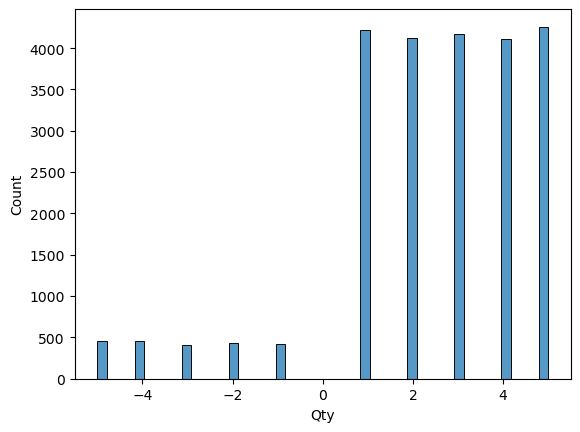

In [386]:
#continuous
sns.histplot(x=Customer_Final.Qty)

<AxesSubplot:xlabel='Rate', ylabel='Count'>

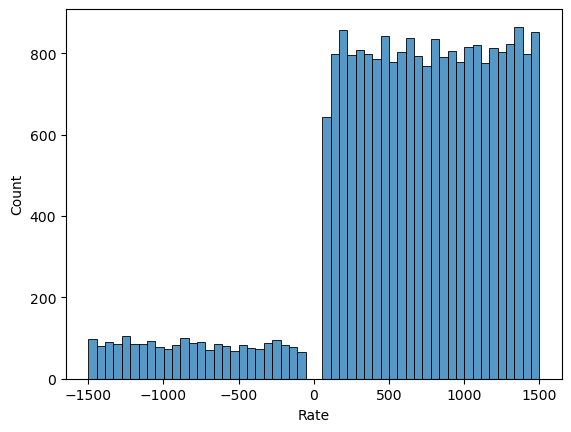

In [387]:
#continuous
sns.histplot(x=Customer_Final.Rate)

<AxesSubplot:xlabel='Tax', ylabel='Count'>

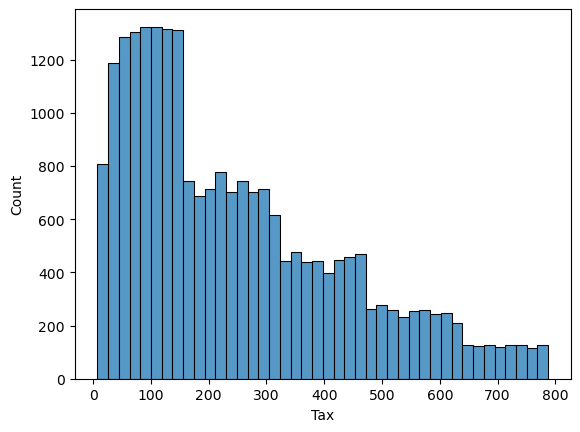

In [388]:
#continuous
sns.histplot(x=Customer_Final.Tax)

<AxesSubplot:xlabel='total_amt', ylabel='Count'>

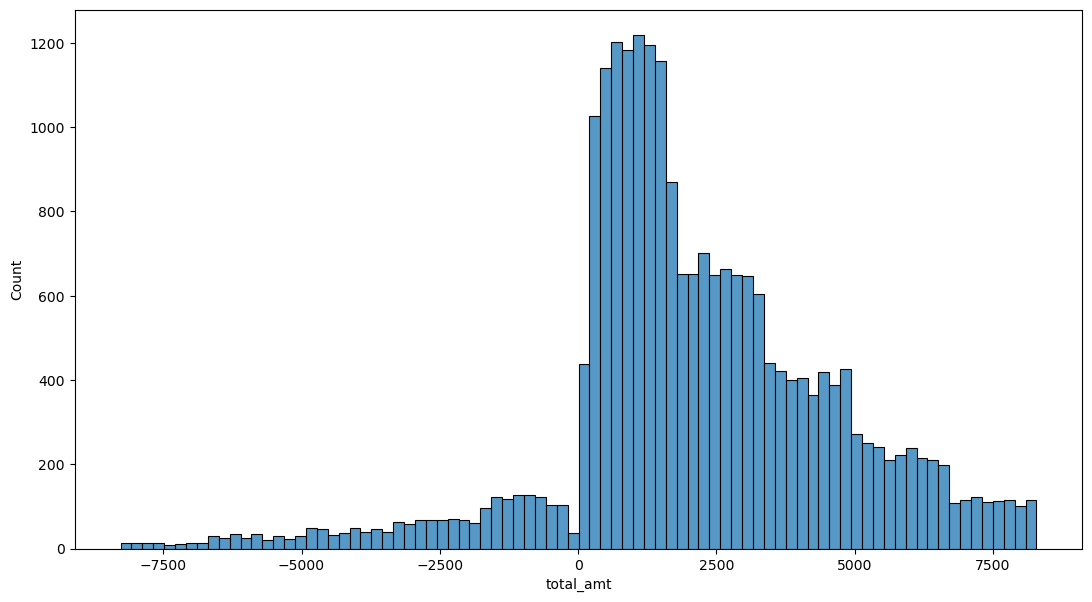

In [389]:
#continuous

plt.figure(figsize=(13,7))
sns.histplot(x=Customer_Final.total_amt)

<AxesSubplot:xlabel='Count', ylabel='Store_type'>

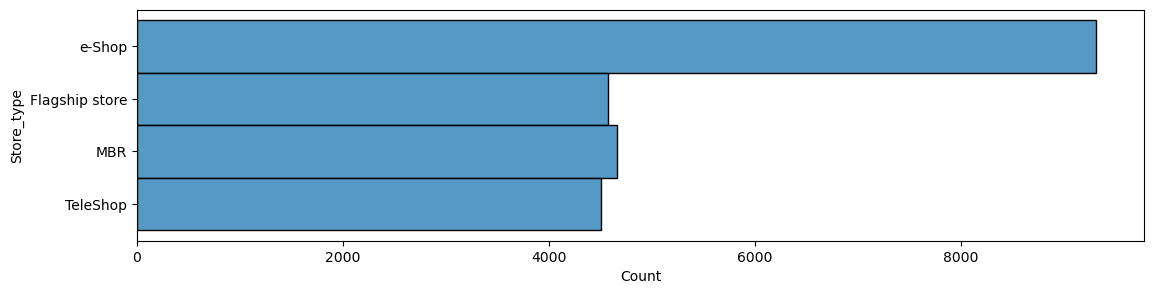

In [390]:
# categotical

plt.figure(figsize=(13,3))
sns.histplot(y=Customer_Final.Store_type)


<AxesSubplot:xlabel='Count', ylabel='Gender'>

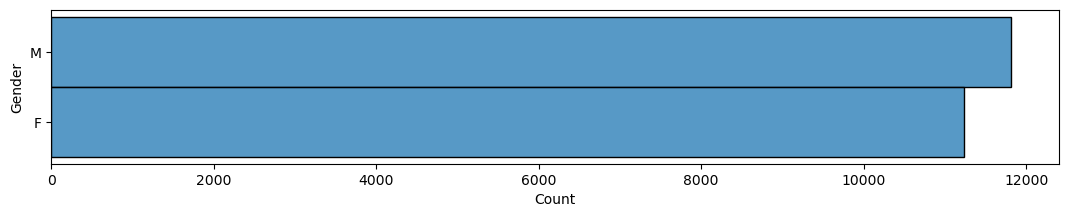

In [391]:
# categotical

plt.figure(figsize=(13,2))
sns.histplot(y=Customer_Final.Gender)


<AxesSubplot:xlabel='Count', ylabel='city_code'>

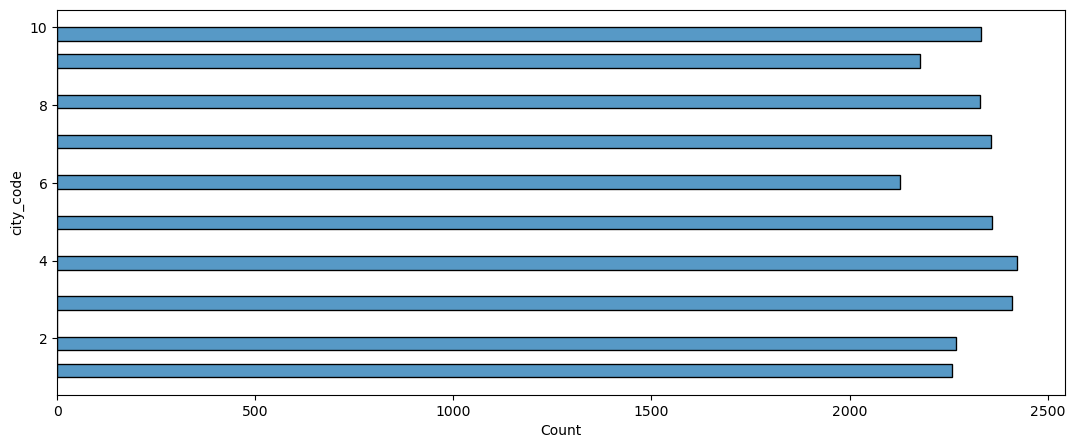

In [392]:
# categorical

plt.figure(figsize=(13,5))
sns.histplot(y=Customer_Final.city_code )


<AxesSubplot:xlabel='Count', ylabel='prod_cat'>

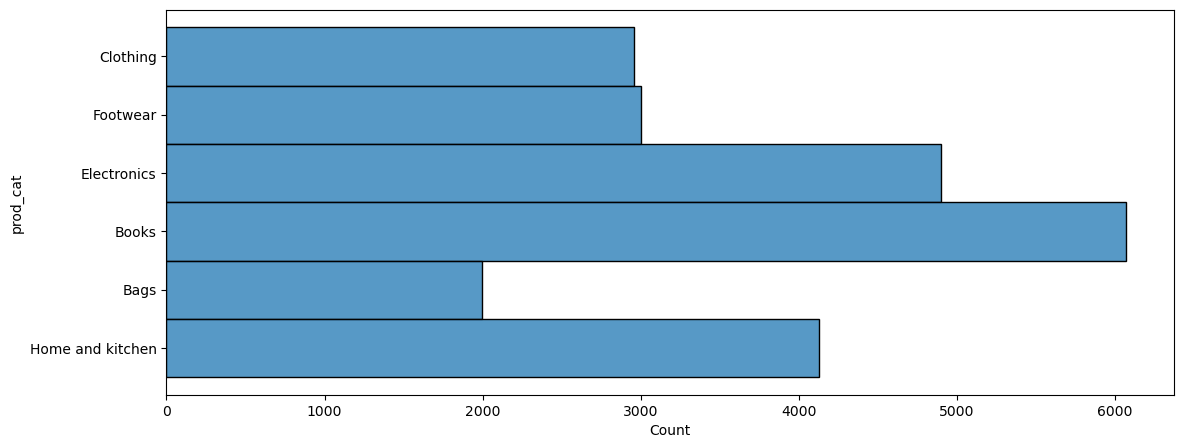

In [393]:
#categorical

plt.figure(figsize=(13,5))
sns.histplot(y=Customer_Final.prod_cat)


<AxesSubplot:xlabel='Count', ylabel='prod_subcat'>

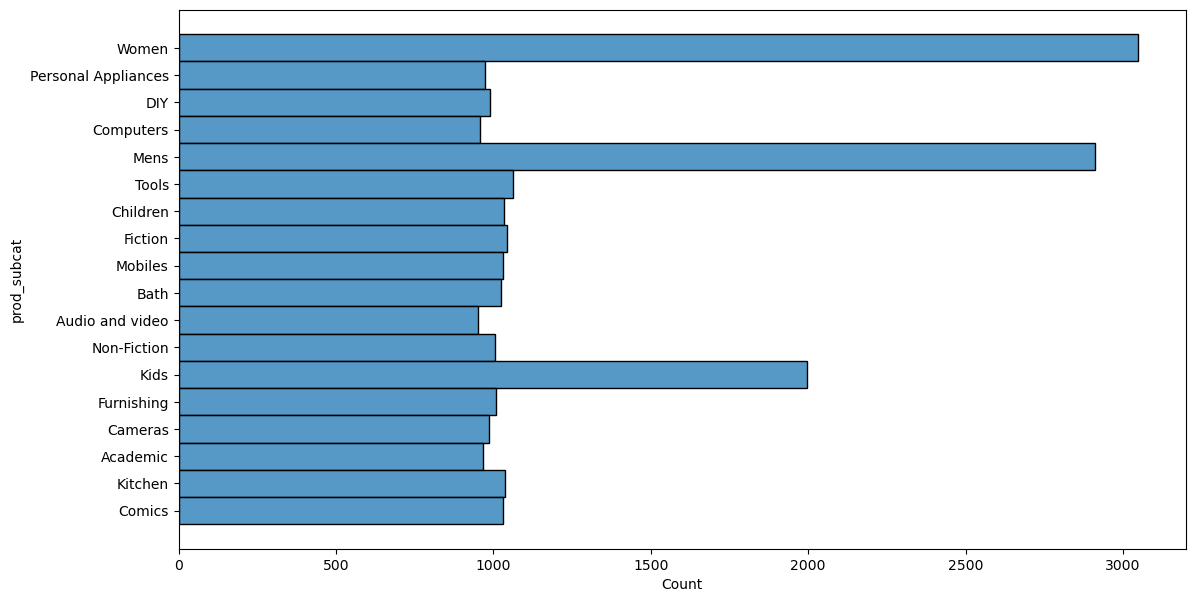

In [394]:
#categorical

plt.figure(figsize=(13,7))
sns.histplot(y=Customer_Final.prod_subcat)


##### 4. Calculate the following information using the merged dataset :
###### a. Time period of the available transaction data

In [395]:
start_date = Customer_Final.tran_date.min()

end_date = Customer_Final.tran_date.max()

time_period = end_date-start_date

print("Transaction data available "+ str(time_period.days) +" days which is approx. 3 years 9 days time period.")

Transaction data available 1130 days which is approx. 3 years 9 days time period.


##### b. Count of transactions where the total amount of transaction was negative

In [396]:
Customer_Final[Customer_Final.total_amt<0].shape[0]


2177

##### 5. Analyze which product categories are more popular among females vs male customers.

In [397]:
M_data = Customer_Final[Customer_Final.Gender=="M"]


print("product categories are more popular among male customers.")

M_data.groupby(by="prod_cat").prod_cat.count().sort_values(ascending=False)


product categories are more popular among male customers.


prod_cat
Books               3116
Electronics         2570
Home and kitchen    2134
Clothing            1518
Footwear            1469
Bags                1004
Name: prod_cat, dtype: int64

In [398]:
F_data = Customer_Final[Customer_Final.Gender=="F"]


print("product categories are more popular among females customers.")

F_data.groupby(by="prod_cat").prod_cat.count().sort_values(ascending=False)

product categories are more popular among females customers.


prod_cat
Books               2949
Electronics         2328
Home and kitchen    1994
Footwear            1529
Clothing            1439
Bags                 994
Name: prod_cat, dtype: int64

##### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [399]:
Customer_in_city = pd.DataFrame( Customer_Final.groupby(by="city_code").cust_id.count().sort_values(ascending=False) )


In [400]:
Customer_in_city["percentage of cust."]= round( ( Customer_in_city.cust_id / Customer_in_city.cust_id.sum() )*100, 2)

In [401]:
Customer_in_city.head(1)

,cust_id,percentage of cust.
city_code,,
4.0,2422,10.51


##### 7. Which store type sells the maximum products by value and by quantity?

In [402]:
Customer_Final.groupby(by="Store_type").agg({ "Qty": np.sum,
                                              "total_amt": np.sum }).sort_values(by=["Qty","total_amt"], 
                                                                                 ascending=[False, False])


,Qty,total_amt
Store_type,,
e-Shop,22763,1.982482e+07
MBR,11194,9.674486e+06
Flagship store,11133,9.715688e+06
TeleShop,10984,9.364781e+06


##### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [403]:
Customer_Final.loc[
    (Customer_Final["Store_type"] == "Flagship store") & ( Customer_Final["prod_cat"].isin(["Clothing","Electronics"]) )
                    ].total_amt.sum()

3409559.27

##### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [404]:
Customer_Final.loc[ (Customer_Final["Gender"] == "M") & (Customer_Final["prod_cat"]=="Electronics") ].total_amt.sum()

5703109.425000001

##### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [405]:
#droped -ve rows
Customer_Final.drop(Customer_Final.loc[Customer_Final.total_amt<0].index, inplace=True)

In [406]:
#summary
customers = Customer_Final.groupby(by="cust_id").agg({"transaction_id": "nunique"})

customers[customers.transaction_id>10]

,transaction_id
cust_id,
266794,11
270535,11
270803,11
272741,11
273014,11
274227,11


In [407]:
# total number of customers

customers[customers.transaction_id>10].index.size

6

###### 11. For all customers aged between 25 - 35, find out:
###### a. What was the total amount spent for “Electronics” and “Books” product categories?


In [408]:
Date = Customer_Final.tran_date.max()    # from which age will be calculated

Cal_Age = (Date - Customer_Final.DOB)/365.25        # in years

Cal_Age

1       32 days 09:39:32.895277207
2       32 days 16:53:13.429158111
4       27 days 08:33:30.677618070
5       43 days 15:43:14.661190965
6       30 days 08:54:12.566735113
                   ...            
23048   40 days 08:24:38.439425051
23049   41 days 03:55:33.880903491
23050   32 days 18:55:26.488706365
23051   25 days 04:27:06.283367556
23052   30 days 02:00:14.784394250
Name: DOB, Length: 20876, dtype: timedelta64[ns]

In [409]:
Customer_Final["cust_age"] = Cal_Age.dt.days      # created age column

Customer_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat,cust_age
1,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women,32
2,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,1981-06-08,M,3.0,Clothing,Women,32
4,92814475704,267750,2013-08-07,1,1,4,284,119.280,1255.280,Flagship store,1986-10-13,M,1.0,Clothing,Women,27
5,4737317330,269345,2011-07-29,1,1,5,1141,599.025,6304.025,MBR,1970-06-26,F,10.0,Clothing,Women,43
6,44425889101,274987,2012-03-18,1,1,4,897,376.740,3964.740,Flagship store,1983-10-08,M,2.0,Clothing,Women,30


In [410]:
Customer_Final.loc[(Customer_Final.cust_age>=25) & 
                   (Customer_Final.cust_age<=35) & 
                   ( Customer_Final.prod_cat.isin(["Electronics","Books"]) )
                   
                  ].groupby(by="prod_cat").agg({"total_amt":np.sum})

,total_amt
prod_cat,
Books,6714704.880
Electronics,5663232.185


###### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [411]:
strt_d = pd.to_datetime("01-jan-2014", format="%d-%b-%Y")
end_d  = pd.to_datetime("01-mar-2014", format="%d-%b-%Y")


In [412]:
Customer_Final.loc[(Customer_Final.tran_date>=strt_d) & 
                                  (Customer_Final.tran_date<=end_d) &
                                  (Customer_Final.cust_age>=25) & 
                                   (Customer_Final.cust_age<=35)].total_amt.sum()

1205210.2400000002